In [32]:
#Always include important imports at the top
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV
import time

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report #for nice end formatting
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.decomposition import PCA

df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [33]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [34]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [35]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load dataset into a pandas DataFrame
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

# One-Hot Encode categorical variables
cat_cols = ['Education', 'Family', 'Personal Loan', 'Securities Account', 'CD Account', 'Online']
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_cols = encoder.fit_transform(df[cat_cols])
encoded_df = pd.concat([df.drop(cat_cols, axis=1), pd.DataFrame(encoded_cols)], axis=1)

# Set CreditCard as target variable and all other columns as input features
X = encoded_df.drop(['CreditCard'], axis=1)
y = encoded_df['CreditCard']

In [36]:
#Standardizing features
sc = StandardScaler()
X = sc.fit_transform(X)

#Confirm the new mean and standard deviation of the dataset
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 1)


/Users/piyushashinde/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/piyushashinde/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [37]:
#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 40)

In [38]:
start = time.time()

#Instantiate the model
svc_default = SVC() # Default hyperparameters
#Fit the model with data
svc_default.fit(X_train,y_train)

end = time.time()
svm_time = end-start
print('Train Time (seconds) of Default SVM:',svm_time)

y_pred_default = svc_default.predict(X_test)

print('Default Accuracy Score:',accuracy_score(y_test,y_pred_default))

Train Time (seconds) of Default SVM: 0.7331321239471436
Default Accuracy Score: 0.7552


In [39]:
start = time.time()

#Polynomial Kernel
svc_poly = SVC(kernel = 'poly')
#Fit the model with data
svc_poly.fit(X_train,y_train)

end = time.time()
svm_time = end-start
print('Train Time (seconds) of SVM with polynomial kernel:',svm_time)

y_pred_poly = svc_poly.predict(X_test)

print('Polynomial Accuracy Score:',accuracy_score(y_test,y_pred_poly))

Train Time (seconds) of SVM with polynomial kernel: 0.5376260280609131
Polynomial Accuracy Score: 0.7544


In [40]:
start = time.time()

#Radial Kernel
svc_rad = SVC(kernel = 'rbf', probability = True)
#Fit the model with data
svc_rad.fit(X_train,y_train)

end = time.time()
svm_time = end-start
print('Train Time (seconds) of SVM with radial kernel:',svm_time)

y_pred_rad = svc_rad.predict(X_test)

Train Time (seconds) of SVM with radial kernel: 3.8273870944976807


In [41]:
print("Accuracy:", accuracy_score(y_test,y_pred_rad))

Accuracy: 0.7552


Text(0.5, 427.9555555555555, 'Predicted label')

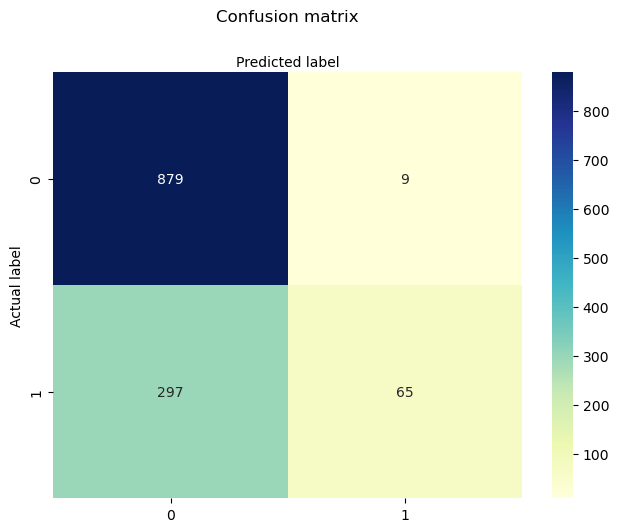

In [42]:
#Creating the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_rad)
class_names=[0,1] # name  of classes

#Creating the figure
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Adding the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [43]:
#Print a nicely formatted report
classify_svc = classification_report(y_test, y_pred_rad)
print("\nClassification Report")
print(classify_svc)


Classification Report
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       888
           1       0.88      0.18      0.30       362

    accuracy                           0.76      1250
   macro avg       0.81      0.58      0.57      1250
weighted avg       0.79      0.76      0.69      1250



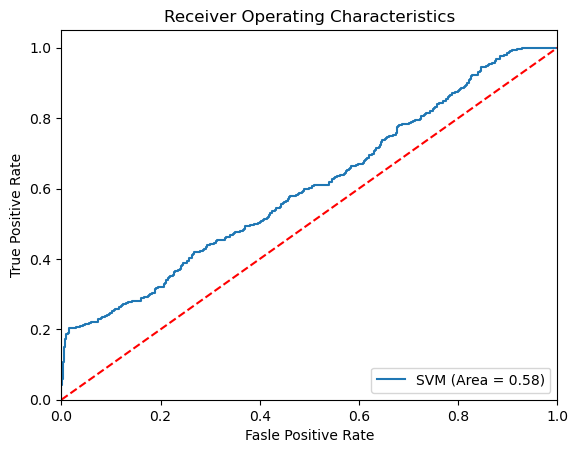

In [44]:
#Plot the ROC curve
svc_roc_auc = roc_auc_score(y_test,y_pred_rad)
fpr, tpr, thresholds = roc_curve(y_test,svc_rad.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='SVM (Area = %0.2f)' % svc_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

The red dashed line represents a random classifier, while the closer the ROC curve is to the top-left corner, the better the performance of the model.
Hoever for this case, the ROC curve is close to the red line which represents less accuracy and it indicates that the model's predictive power is not much better than random chance. 

# Implementing PCA

In [25]:
# Make an instance of the model and specify that 90% of the variance needs to be retained
n = 80
pca = PCA(n/100)

# Fit the PCA on the training set
pca.fit(X_train)

print('To retain',n,'% of the variation, we needed',pca.n_components_,'components')

To retain 80 % of the variation, we needed 8 components


In [26]:
# Applying transformation to both Training and Test set

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [27]:
# SVM with PCA

start = time.time()

svc_pca = SVC(kernel = 'rbf', probability = True)
svc_pca.fit(X_train_pca, y_train)

end = time.time()
svm_time_pca = end-start
print('Train Time (seconds) of SVM with PCA:',svm_time_pca)

y_pred_svc_pca = svc_pca.predict(X_test_pca)

Train Time (seconds) of SVM with PCA: 3.607097864151001


In [28]:
print("Accuracy:", accuracy_score(y_test,y_pred_svc_pca))

Accuracy: 0.7512


Text(0.5, 427.9555555555555, 'Predicted label')

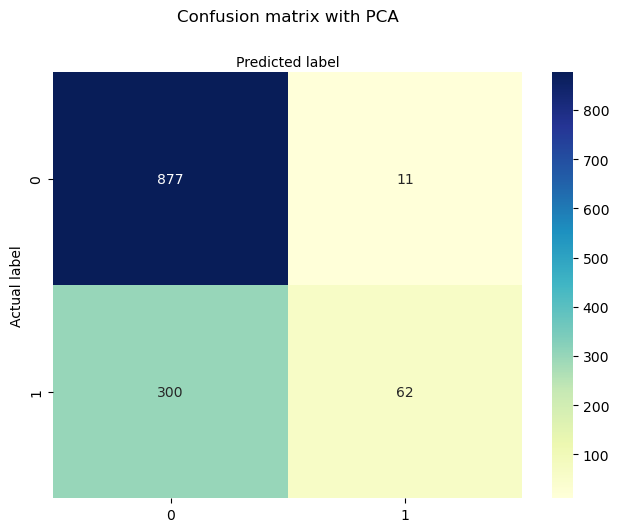

In [29]:
#Creating the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_svc_pca)
class_names=[0,1] # name  of classes

#Creating the figure
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Adding the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix with PCA', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [30]:
classify_svc_pca = classification_report(y_test, y_pred_svc_pca)
print("\nClassification Report with PCA")
print(classify_svc_pca)


Classification Report with PCA
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       888
           1       0.85      0.17      0.29       362

    accuracy                           0.75      1250
   macro avg       0.80      0.58      0.57      1250
weighted avg       0.78      0.75      0.69      1250



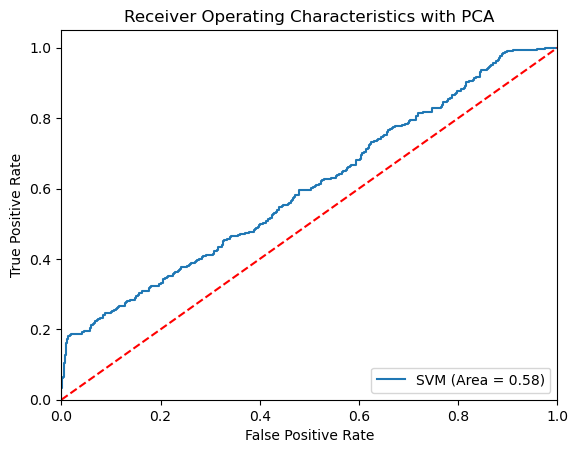

In [31]:
svc_roc_auc_pca = roc_auc_score(y_test,y_pred_svc_pca)
fpr, tpr, thresholds = roc_curve(y_test,svc_pca.predict_proba(X_test_pca)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='SVM (Area = %0.2f)' % svc_roc_auc_pca)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics with PCA')
plt.legend(loc="lower right")
plt.show()


PCA made SVM slightly less accurate, but it also ran slightly faste